C:\Users\yurid\anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log10
C:\Users\yurid\anaconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log10


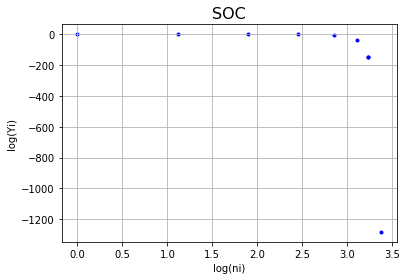

4096 4096


C:\Users\yurid\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


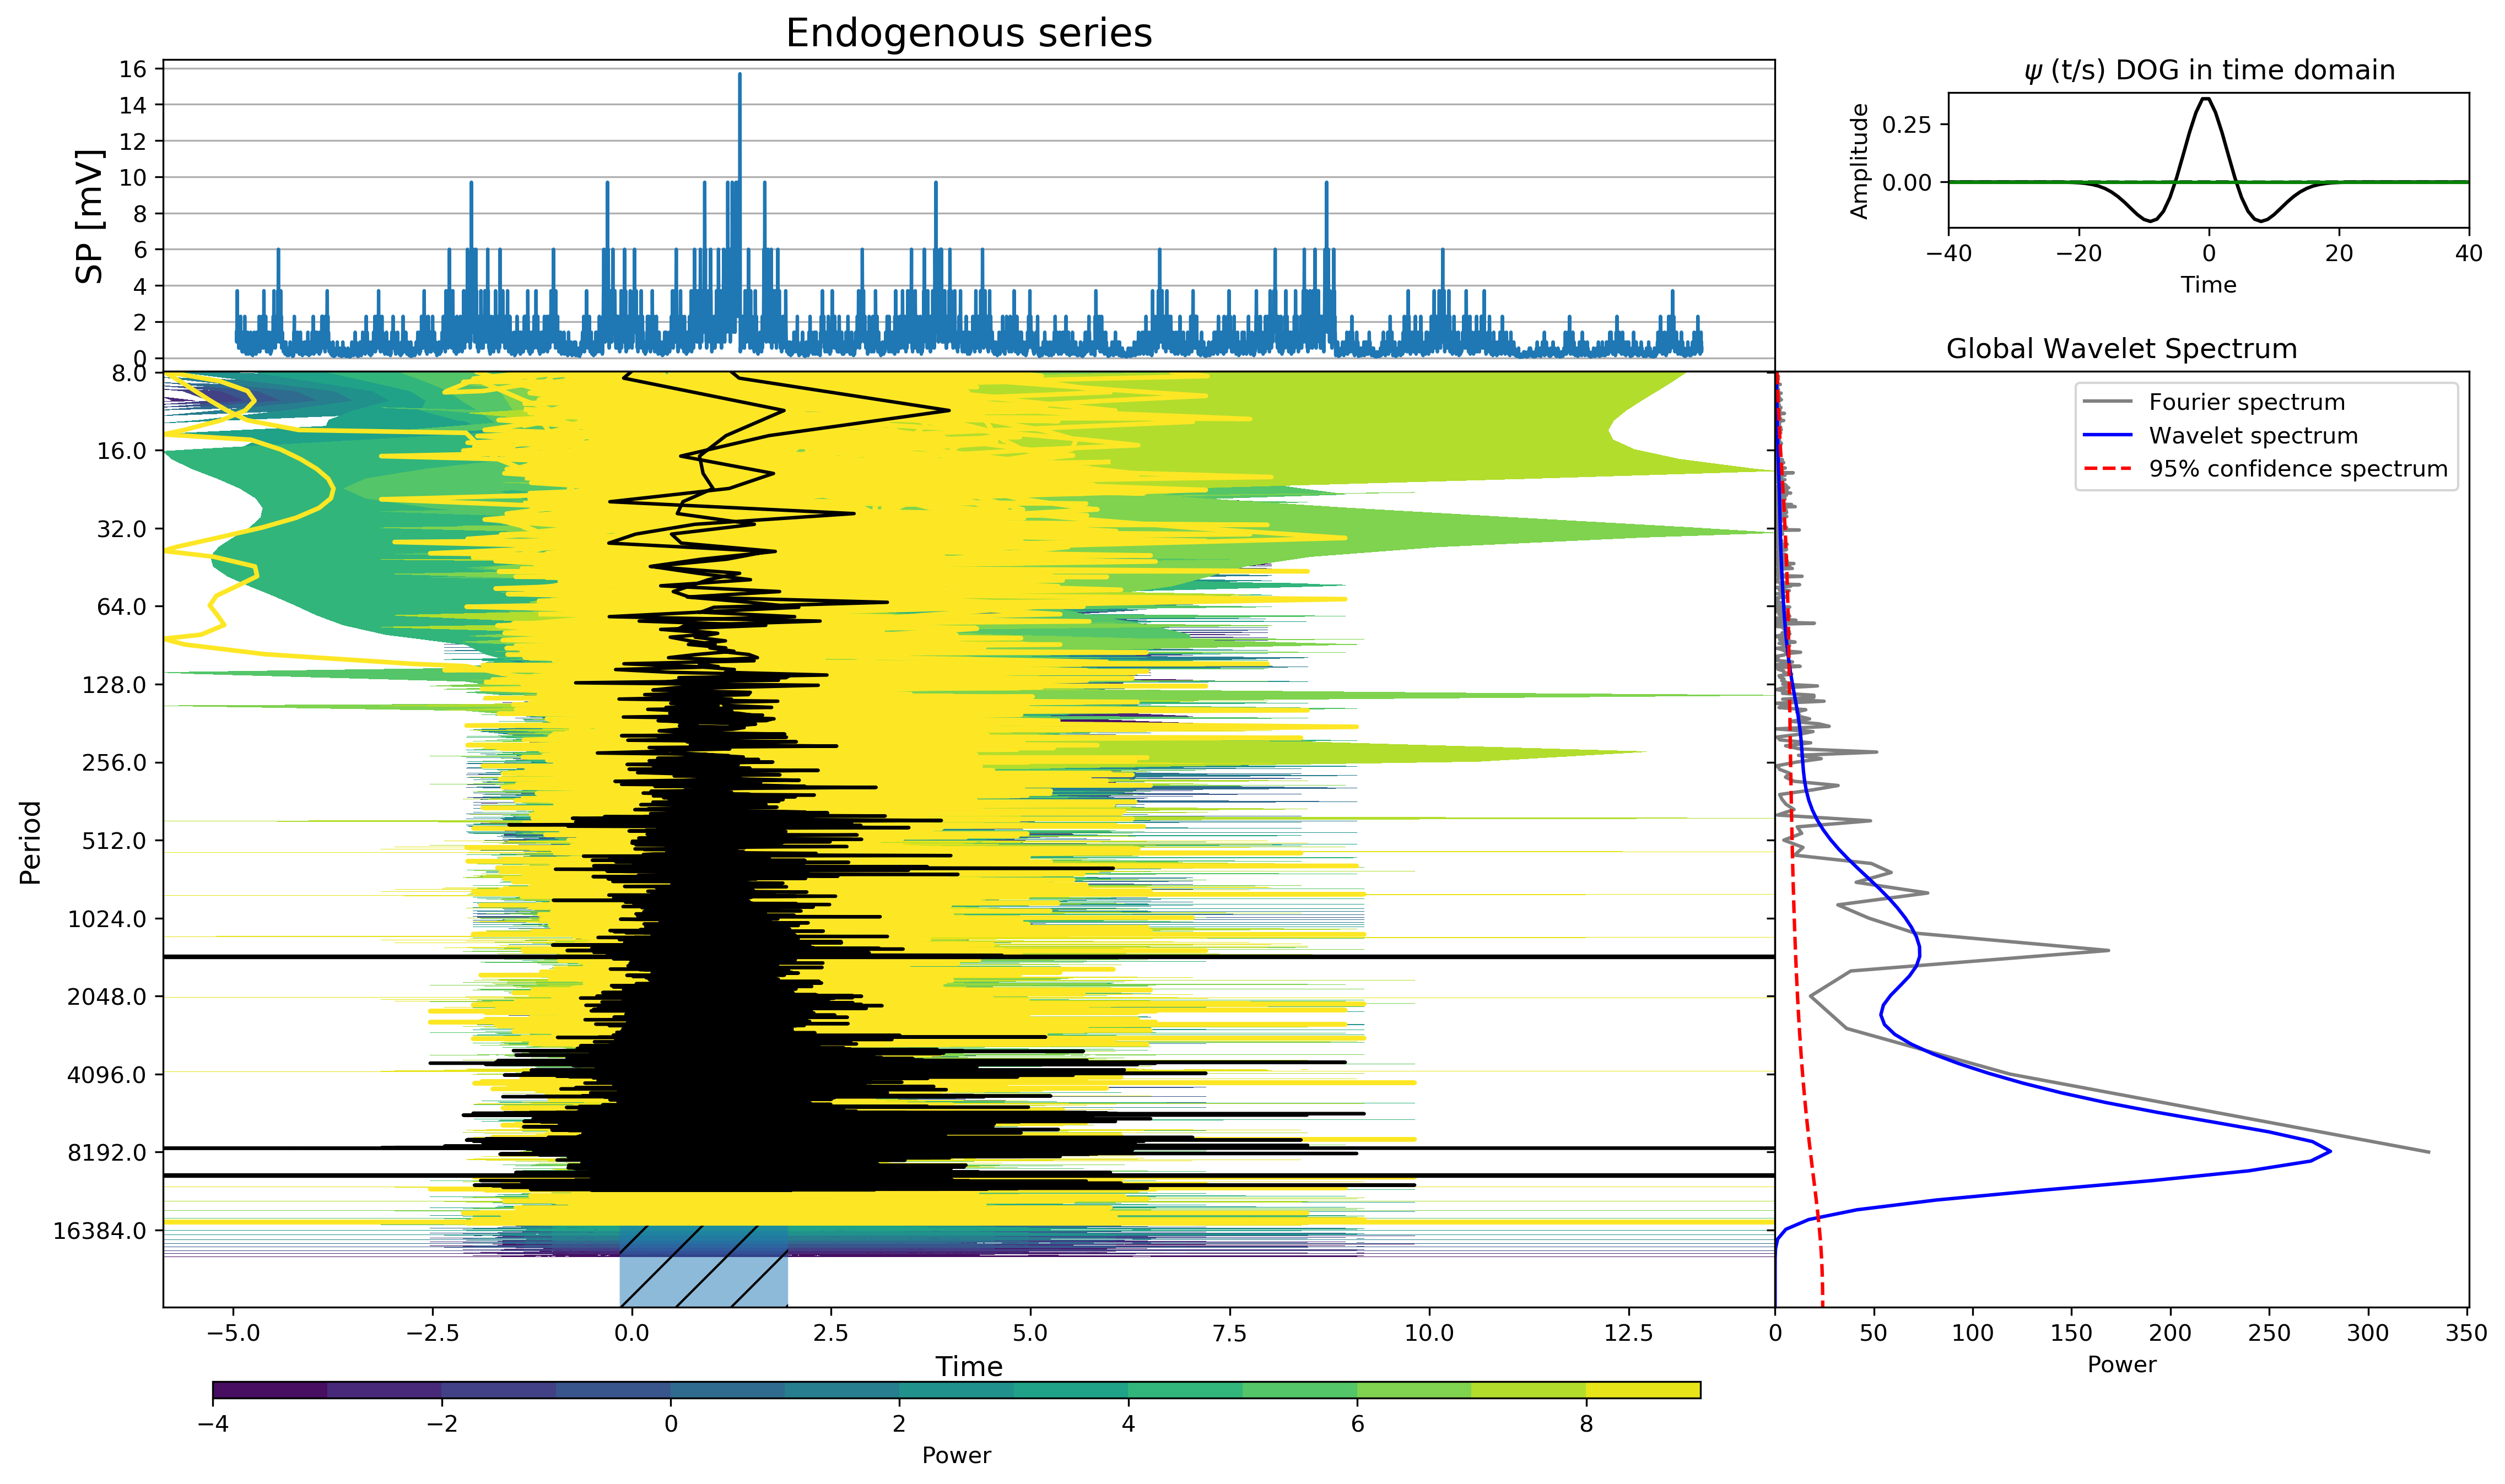

C:\Users\yurid\anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log10
C:\Users\yurid\anaconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log10


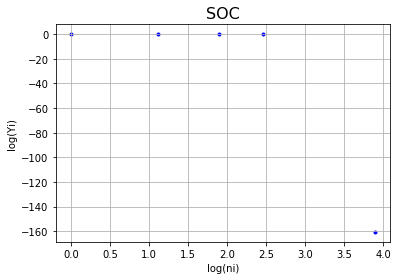

4096 4096


C:\Users\yurid\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


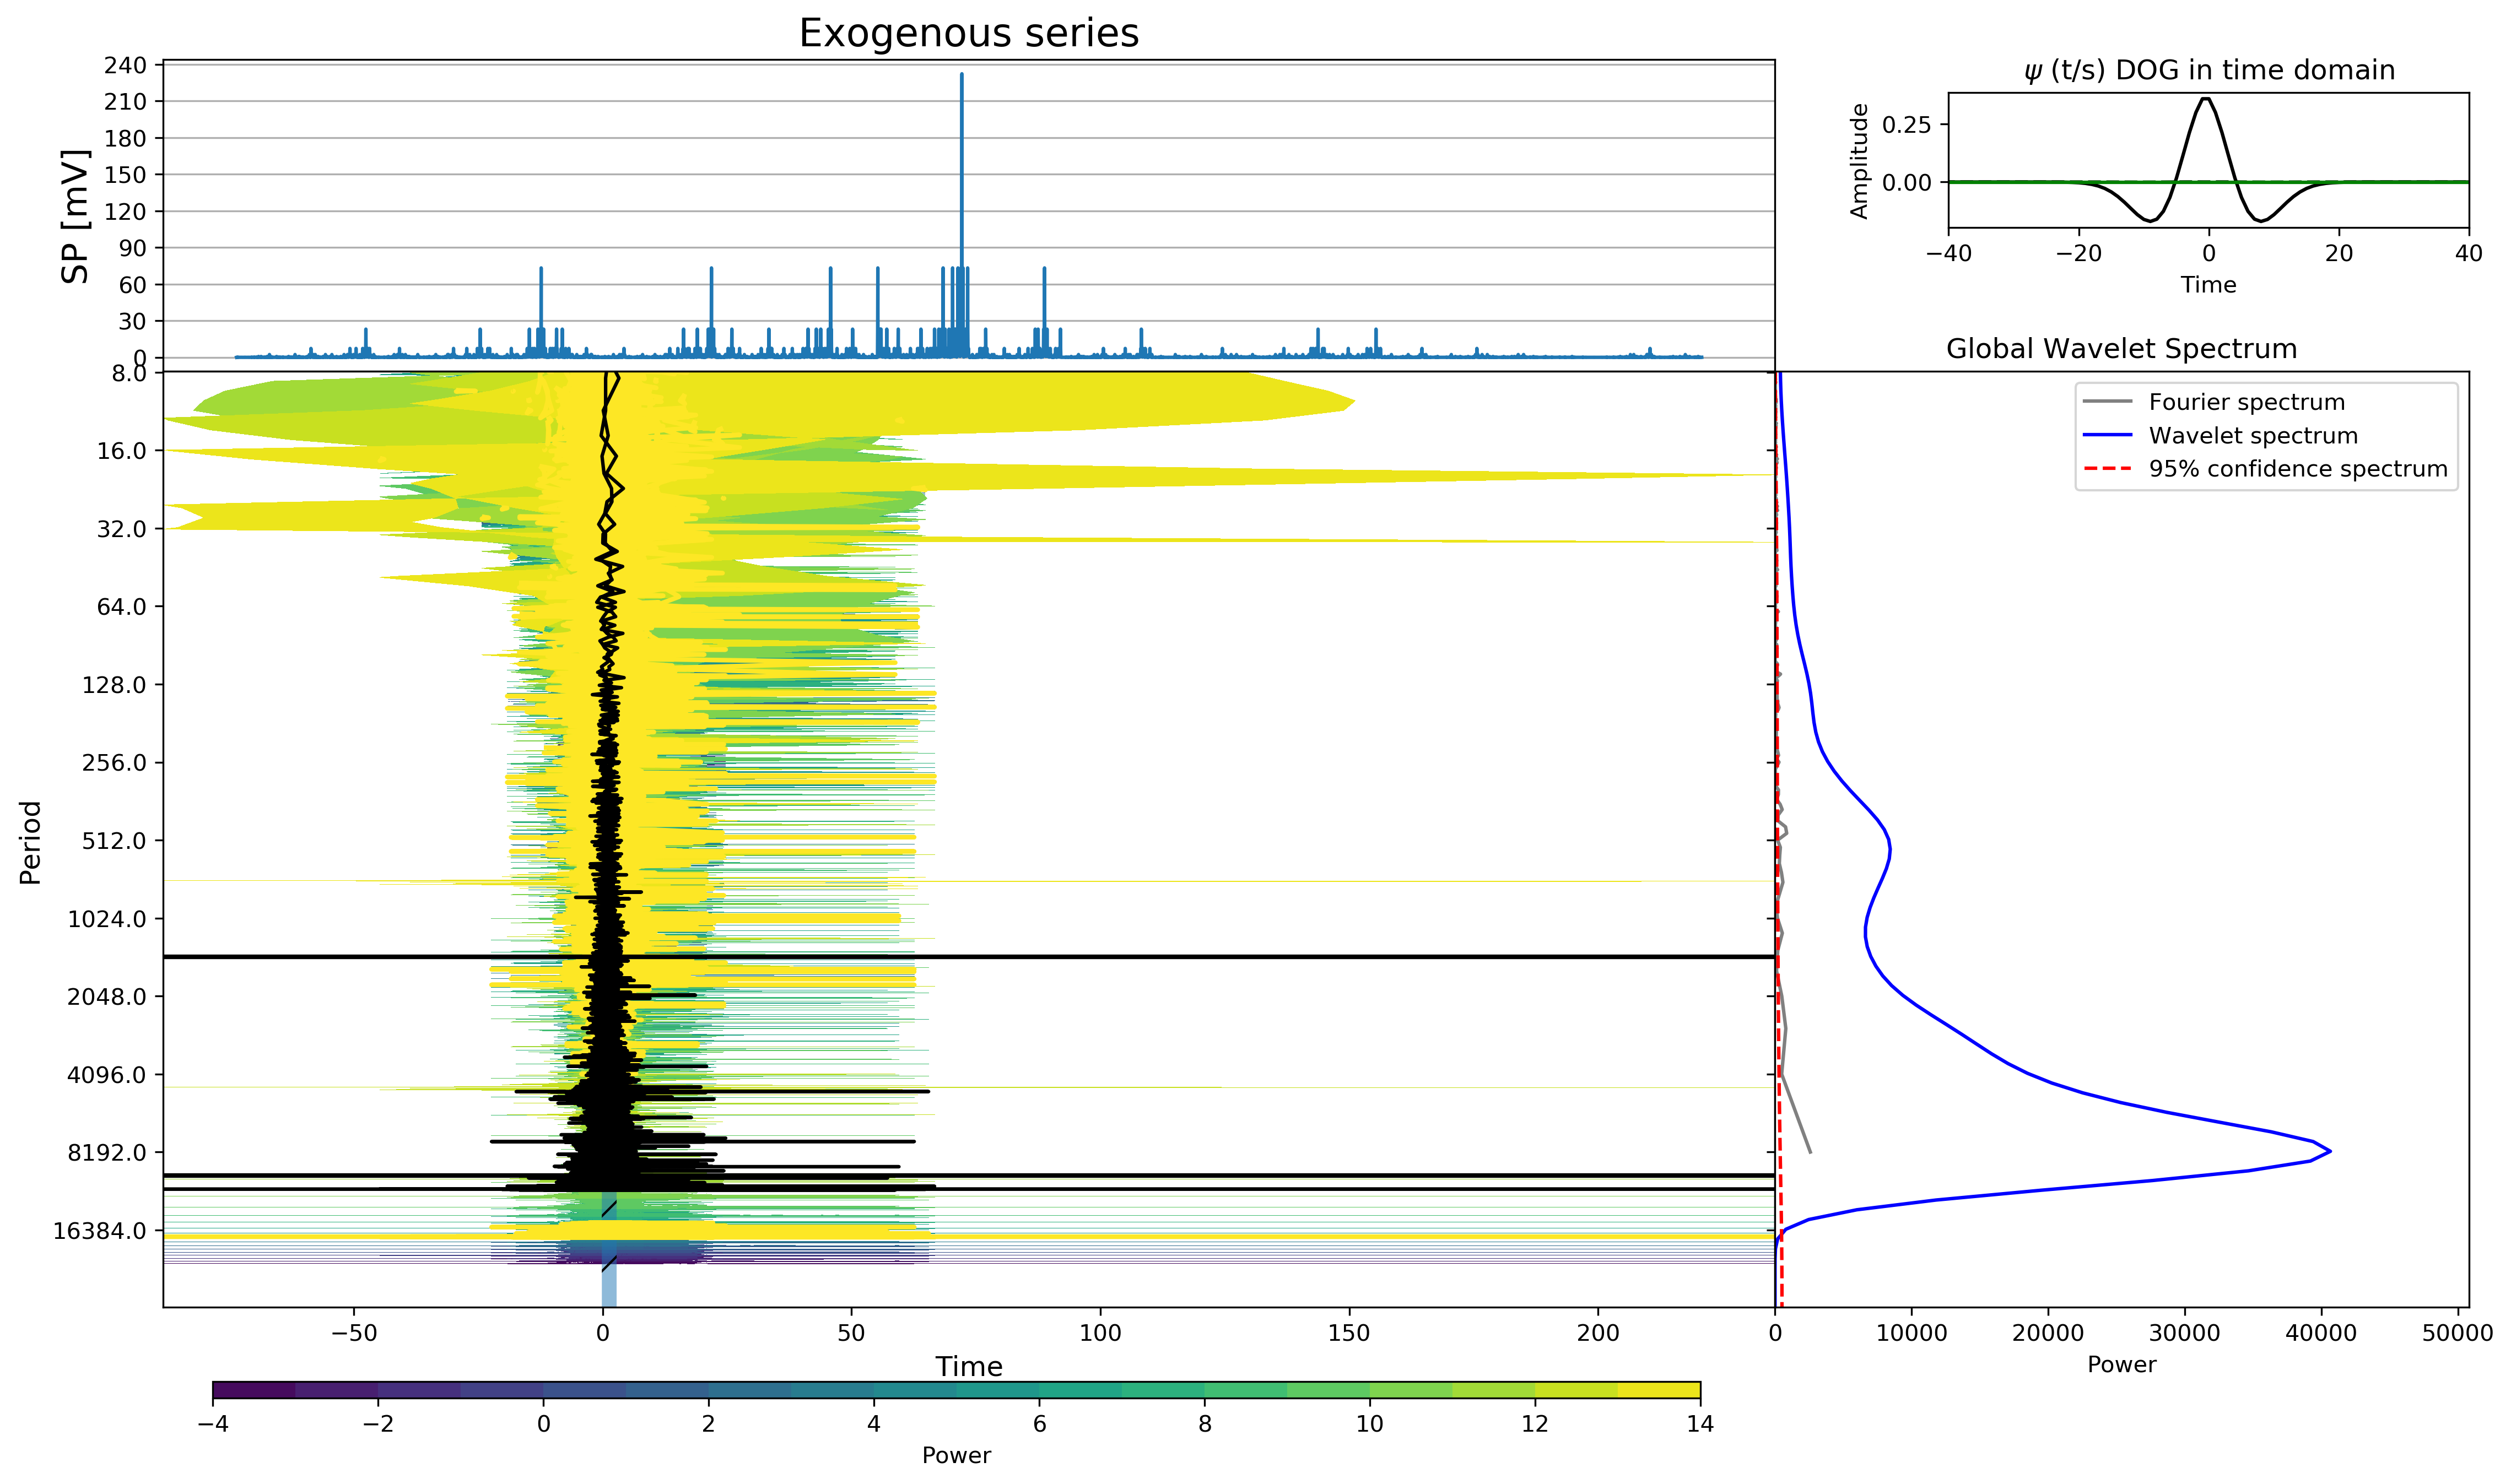

In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import waipy
import scipy.special

def pmodel(seriestype):
    if(seriestype=="Endogenous"):
        p=0.32 + 0.1*rnd.uniform()
        slope=0.4
    else:
        p=0.18 + 0.1*rnd.uniform()
        slope=0.7
    noValues=8192

    noOrders = int(np.ceil(np.log2(noValues)))
    
    y = np.array([1])
    for n in range(noOrders):
        y = next_step_1d(y, p)
    
    if (slope):
        fourierCoeff = fractal_spectrum_1d(noValues, slope/2)
        meanVal = np.mean(y)
        stdy = np.std(y)
        x = np.fft.ifft(y - meanVal)
        phase = np.angle(x)
        x = fourierCoeff*np.exp(1j*phase)
        x = np.fft.fft(x).real
        x *= stdy/np.std(x)
        x += meanVal
    else:
        x = y
    return x[0:noValues], y[0:noValues]


def next_step_1d(y, p):
    y2 = np.zeros(y.size*2)
    sign = np.random.rand(1, y.size) - 0.5
    sign /= np.abs(sign)
    y2[0:2*y.size:2] = y + sign*(1-2*p)*y
    y2[1:2*y.size+1:2] = y - sign*(1-2*p)*y
    
    return y2


def fractal_spectrum_1d(noValues, slope):
    ori_vector_size = noValues
    ori_half_size = ori_vector_size//2
    a = np.zeros(ori_vector_size)
    
    for t2 in range(ori_half_size):
        index = t2
        t4 = 1 + ori_vector_size - t2
        if (t4 >= ori_vector_size):
            t4 = t2
        coeff = (index + 1)**slope
        a[t2] = coeff
        a[t4] = coeff
        
    a[1] = 0
    
    return a

def SOC(data, n_bins=50):
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    std = np.std(data)
    #print("mean: ", mean, " var: ", var)
    """ Computa a Taxa Local de Flutuação para cada valor da ST """ 
    Gamma = []
    
    for i in range(0,n): 
        Gamma.append((data[i] - mean)/var) 
        # Gamma.append((data[i] - mean)/std)
    
        """ Computa P[Psi_i] """
    
    
    counts, bins = np.histogram(Gamma, n_bins)
    Prob_Gamma = []
    for i in range(0, n_bins):
        Prob_Gamma.append(counts[i]/n) #plt.plot(Gamma)    
    log_Prob = np.log10(Prob_Gamma) 
    p = np.array(Prob_Gamma)
    p = p[np.nonzero(p)]
    c = counts[np.nonzero(counts)] 
    log_p = np.log10(p)
    a = (log_p[np.argmax(c)] - log_p[np.argmin(c)]) / (np.max(c) - np.min(c)) 
    b = log_Prob[0]
    y = b * np.power(10, (a*counts))
    
    
    """ Plotagem """
    
    plt.clf()
    plt.scatter(np.log10(counts), y, marker=".", color="blue")
    plt.title('SOC', fontsize = 16) 
    plt.xlabel('log(ni)')
    plt.ylabel('log(Yi)') 
    plt.grid()
    plt.show() 

for i in range(1):
    x,p=pmodel("Endogenous")
    SOC(p)

result=waipy.cwt(p, 1, 1, 0.125, 2, 4/0.125, 0.72, 6, 'DOG', "x")
waipy.wavelet_plot("Endogenous series", x, p, 0.03125, result, True)

for i in range(1):
    x,p=pmodel("Exogenous")
    SOC(p)
result=waipy.cwt(p, 1, 1, 0.125, 2, 4/0.125, 0.72, 6, 'DOG', "x")
waipy.wavelet_plot("Exogenous series", x, p, 0.03125, result, True)